In [2]:
from ctapipe.utils.datasets import get_path
from ctapipe.io.hessio import hessio_event_source
from ctapipe import visualization, io
from matplotlib import pyplot as plt
from astropy import units as u
from ctapipe.visualization import CameraDisplay
from ctapipe.io import CameraGeometry
import numpy as np
%matplotlib inline

In [2]:
source = hessio_event_source(get_path("/Users/Jason/Software/outputs/sim_telarray/simtel_run4_gcts_hnsb.gz"), max_events=100)

In [3]:
event = next(source)

In [4]:
tels = list(event.dl0.tels_with_data)
img = event.dl0.tel[tels[0]].adc_samples[0]

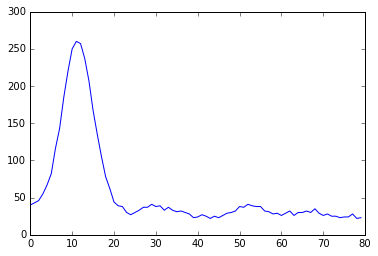

In [5]:
maxpix = np.unravel_index(np.argmax(img),img.shape)
trace = img[maxpix[0]]   
plt.plot(trace)

In [6]:
geom = CameraGeometry.guess(*event.meta.pixel_pos[15], event.meta.optical_foclen[15])
plt.rcParams['figure.figsize'] = (10.0, 8.0)

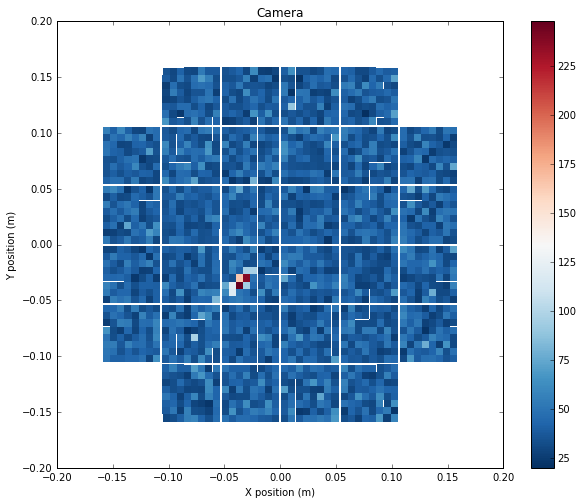

In [7]:
disp = CameraDisplay(geom)
disp.image = img[:,maxpix[1]]
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)  # autoscale

In [8]:
from ctapipe.calib.camera.mc import pixel_integration_mc, set_integration_correction
from pyhessio import get_pedestal
ped = get_pedestal(tels[0])
parameters = {'integrator' : 'full_integration',
                 "nsum": 7,
                  "nskip": 3,
                  "sigamp": [2, 4],
                  "clip_amp": 0,
                  "lwt": 0}
integrated, ped_sub = pixel_integration_mc(event, 0, ped, tels[0], parameters)

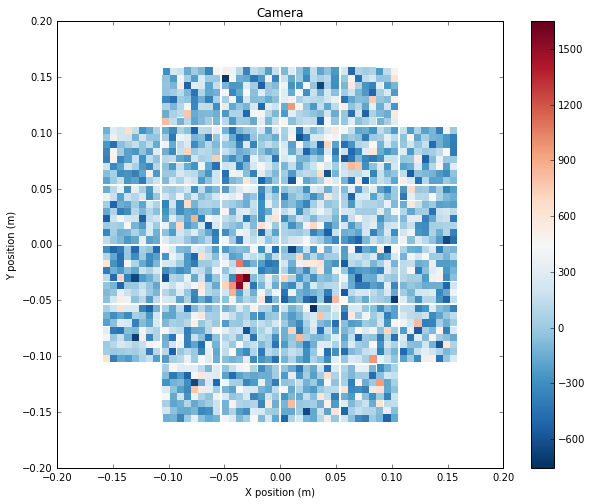

In [9]:
disp = CameraDisplay(geom)
disp.image = integrated[0]
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)  # autoscale

In [10]:
integrated

array([[-138, -122, -333, ..., -231,  134,  500]], dtype=int16)

In [11]:
a = set_integration_correction(tels[0], parameters)

TypeError: only length-1 arrays can be converted to Python scalars

In [12]:
a

NameError: name 'a' is not defined

In [1]:
from ctapipe.calib.camera.tests.test_mc import test_set_integration_correction

In [2]:
test_set_integration_correction()

209.89999999850988
[ -1.   1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.  23.  25.  27.
  29.  31.  33.  35.  37.  39.  41.]


In [3]:
from ctapipe.io.hessio import hessio_event_source
from ctapipe.utils.datasets import get_path
source = hessio_event_source(get_path("/Users/Jason/Software/outputs/sim_telarray/simtel_run4_gcts_hnsb.gz"), max_events=100)
event = next(source)
parameters = {'integrator' : 'full_integration',
                 "window": 7,
                  "shift": 3,
                  "sigamp": [2, 4],
                  "clip_amp": 0,
                  "lwt": 0}
from ctapipe.calib.camera.mc import calibrate_mc_event
def test():
    for event in source:
        calibrate_mc_event(event, parameters)
    
%timeit test()

The slowest run took 6479955.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 233 ns per loop
